0. Import library

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

1. Load data 

In [3]:
breed_data = pd.read_csv('./dog_data/labels.csv')
train = "./dog_data/train/"
test="./dog_data/test/"

In [4]:
breed_data.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


In [5]:
#Number of different breed type
breed_data.breed.value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

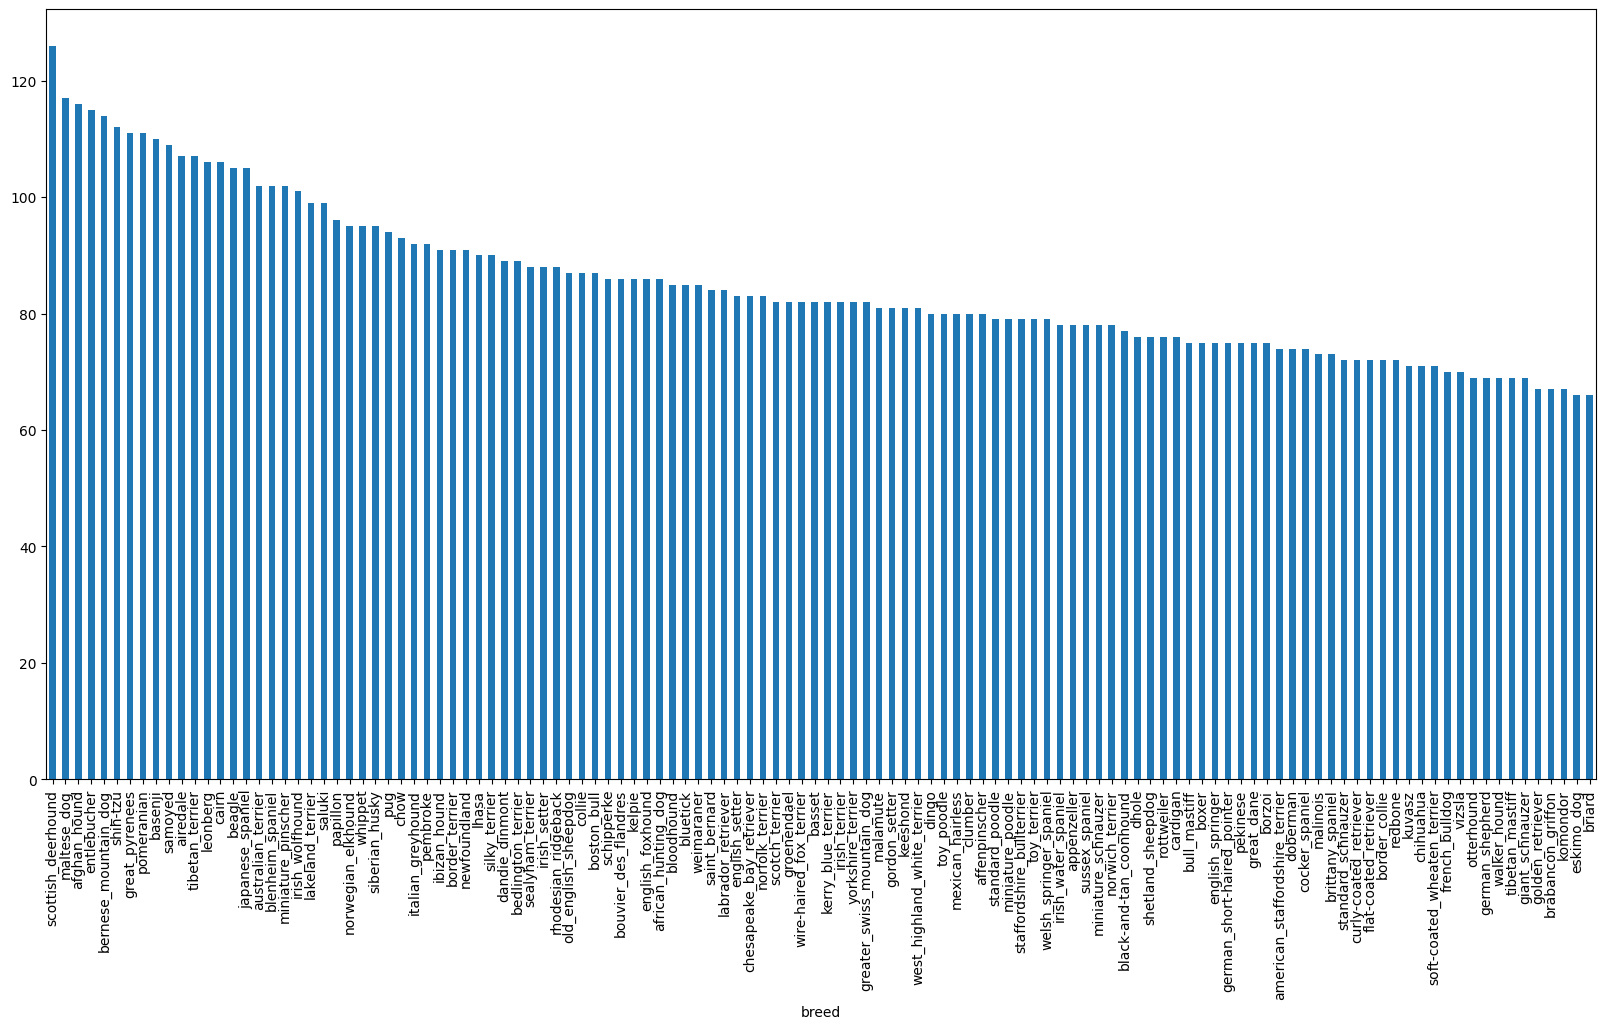

In [6]:
breed_data["breed"].value_counts().plot.bar(figsize=(20, 10));

2. Select representative varieties

In [7]:
#Top 20 breed
top_20=list(breed_data.breed.value_counts()[0:20].index)
top_20

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'leonberg',
 'cairn',
 'beagle',
 'japanese_spaniel',
 'australian_terrier',
 'blenheim_spaniel',
 'miniature_pinscher',
 'irish_wolfhound']

In [8]:
top20_breed=breed_data[breed_data.breed.isin(top_20)]
top20_breed.shape # (column num, raw num)

(2184, 2)

In [9]:
#Number of different breed type
top20_breed.breed.value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
tibetan_terrier         107
airedale                107
leonberg                106
cairn                   106
beagle                  105
japanese_spaniel        105
miniature_pinscher      102
australian_terrier      102
blenheim_spaniel        102
irish_wolfhound         101
Name: count, dtype: int64

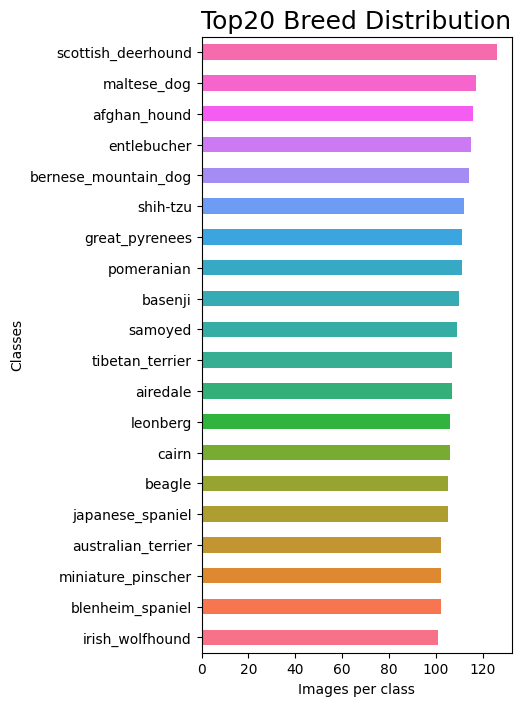

In [10]:
# Create class-specific color mappings
class_colors = sns.color_palette("husl", n_colors=len(top20_breed['breed'].unique()))

# Take a look at the class/breed distribution
ax = pd.value_counts(top20_breed['breed'], ascending=True).plot(kind='barh', fontsize="10", title="Top20 Breed Distribution", figsize=(4, 8), color=class_colors)
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.title.set_size(18)
plt.show()

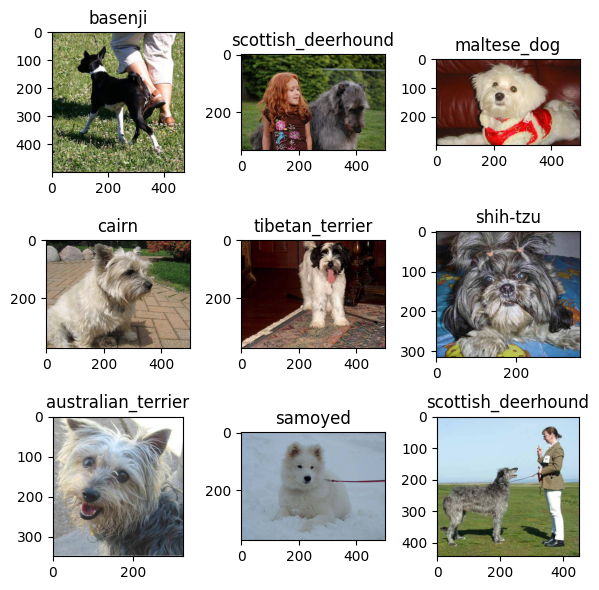

In [11]:
nrow=3
ncol=3
fig,ax=plt.subplots(nrow,ncol,figsize=(6,6))
for i,(img_id,breed) in enumerate(top20_breed[["id","breed"]].values[: nrow*ncol]):
    image_path=os.path.join(train,img_id+".jpg")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    row=i//ncol
    col=i%ncol
    ax[row,col].imshow(image)
    ax[row,col].set_title(breed)
    # ax[row,col].axis("off")
    
plt.tight_layout()
plt.show()

3. Data preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
num_breed = 20
image_size = 200
batch_size = 32
encoder = LabelEncoder()

In [15]:
breed=list(top20_breed["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
top20_breed=top20_breed.query("breed in @new")
top20_breed

,id,breed,image_file
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,003df8b8a8b05244b1d920bb6cf451f9.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,0042188c895a2f14ef64a918ed9c7b64.jpg
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,00693b8bc2470375cc744a6391d397ec.jpg
29,00bee065dcec471f26394855c5c2f3de,cairn,00bee065dcec471f26394855c5c2f3de.jpg
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier,013f8fdf6d638c7bb042f5f17e8a9fdc.jpg
...,...,...,...
10212,ffc532991d3cd7880d27a449ed1c4770,tibetan_terrier,ffc532991d3cd7880d27a449ed1c4770.jpg
10215,ffcde16e7da0872c357fbc7e2168c05f,airedale,ffcde16e7da0872c357fbc7e2168c05f.jpg
10216,ffcffab7e4beef9a9b8076ef2ca51909,samoyed,ffcffab7e4beef9a9b8076ef2ca51909.jpg
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,ffe2ca6c940cddfee68fa3cc6c63213f.jpg


In [16]:
# Create image_file row 
top20_breed['image_file'] = top20_breed['id'].apply(lambda x: x + ".jpg")
top20_breed.head()

,id,breed,image_file
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,003df8b8a8b05244b1d920bb6cf451f9.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,0042188c895a2f14ef64a918ed9c7b64.jpg
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,00693b8bc2470375cc744a6391d397ec.jpg
29,00bee065dcec471f26394855c5c2f3de,cairn,00bee065dcec471f26394855c5c2f3de.jpg
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier,013f8fdf6d638c7bb042f5f17e8a9fdc.jpg


In [17]:
from tensorflow.keras.applications.mobilenet import preprocess_input

train_data=np.zeros((len(top20_breed),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(top20_breed["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

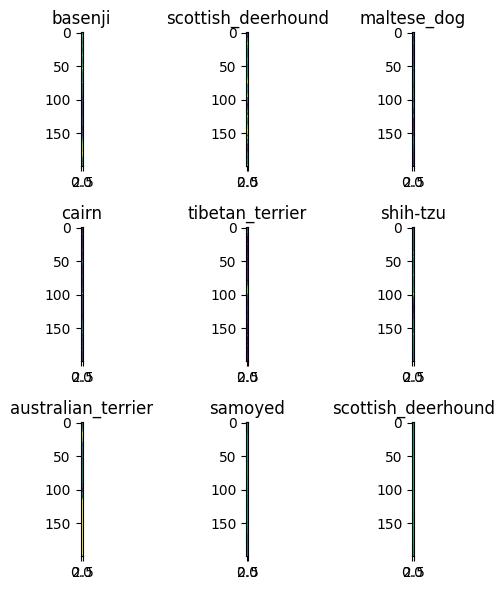

In [18]:
nrow = 3
ncol = 3
fig, ax = plt.subplots(nrow, ncol, figsize=(6, 6))

for i, (img_id, breed) in enumerate(top20_breed[["id", "breed"]].values[:nrow * ncol]):
    image_path = os.path.join(train, img_id + ".jpg")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    row = i // ncol
    col = i % ncol

    # 전처리된 이미지 가져오기
    preprocessed_image = train_data[i]

    # 전처리된 이미지 시각화
    ax[row, col].imshow(preprocessed_image[0])  # [0]은 배치 차원을 제거합니다.
    ax[row, col].set_title(breed)
    # ax[row, col].axis("off")  # 이미지에 대한 축을 표시하지 않도록 변경

plt.tight_layout()
plt.show()


In [19]:
train_data[i]

array([[[ 0.4431373 ,  0.70980394,  0.92156863],
        [ 0.4431373 ,  0.70980394,  0.92156863],
        [ 0.4431373 ,  0.70980394,  0.92156863],
        ...,
        [ 0.4666667 ,  0.7019608 ,  0.90588236],
        [ 0.4666667 ,  0.7019608 ,  0.90588236],
        [ 0.45098042,  0.70980394,  0.90588236]],

       [[ 0.4431373 ,  0.70980394,  0.92156863],
        [ 0.4431373 ,  0.70980394,  0.92156863],
        [ 0.4431373 ,  0.70980394,  0.92156863],
        ...,
        [ 0.4666667 ,  0.7019608 ,  0.90588236],
        [ 0.4666667 ,  0.7019608 ,  0.90588236],
        [ 0.45098042,  0.70980394,  0.90588236]],

       [[ 0.4431373 ,  0.70980394,  0.92156863],
        [ 0.4431373 ,  0.70980394,  0.92156863],
        [ 0.4431373 ,  0.70980394,  0.92156863],
        ...,
        [ 0.4666667 ,  0.7019608 ,  0.90588236],
        [ 0.4666667 ,  0.7019608 ,  0.90588236],
        [ 0.45098042,  0.70980394,  0.90588236]],

       ...,

       [[-0.24705881, -0.06666666, -0.6784314 ],
        [-0

In [20]:
label_data = encoder.fit_transform(top20_breed["breed"].values)

4. Data split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [62]:
print("************************************************************")
print("Train Data Shape :",x_train.shape)
print("************************************************************")
print("Test Data Shape :",x_test.shape)
print("************************************************************")
print("Train Label Data Shape :",y_train.shape)
print("************************************************************")
print("Test Label Data Shape :",y_test.shape)
print("************************************************************")

************************************************************
Train Data Shape : (1747, 200, 200, 3)
************************************************************
Test Data Shape : (437, 200, 200, 3)
************************************************************
Train Label Data Shape : (1747,)
************************************************************
Test Label Data Shape : (437,)
************************************************************


5. Data Augmentation(데이터 증강)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# TensorFlow의 Keras API를 사용하여 이미지 데이터에 데이터 증강
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
# rotation_range: 무작위 회전 각도 범위 (0~45도).
# width_shift_range 및 height_shift_range: 무작위 수평 및 수직 이동 범위 (전체 너비 또는 높이에 대한 비율).
# shear_range: 무작위 전단 강도.
# zoom_range: 무작위 확대/축소 범위.
# horizontal_flip: 수평 뒤집기 여부.
# fill_mode: 회전 또는 이동 후 채울 픽셀의 전략 (가장 가까운 이웃, 상수 값, 또는 반사).

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [23]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# ResNet50V2 모델 로드
resnet = ResNet50V2(input_shape=[image_size, image_size, 3], weights='imagenet', include_top=False)

# ResNet50V2의 레이어를 학습되지 않도록 설정
for layer in resnet.layers:
    layer.trainable = False

# 모델의 출력 레이어를 가져옴
x = resnet.output

# BatchNormalization 레이어 추가
x = BatchNormalization()(x)

# GlobalAveragePooling2D 레이어 추가
x = GlobalAveragePooling2D()(x)

# Fully Connected 레이어 추가
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# Dropout 레이어 추가
x = Dropout(0.2)(x)

# 출력 레이어 추가 (num_breed에 해당하는 클래스 수에 따라 softmax 활성화 함수 사용)
prediction = Dense(num_breed, activation='softmax')(x)

# 전체 모델 구성
model = Model(inputs=resnet.input, outputs=prediction)

# 옵티마이저 및 손실 함수 설정
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# 모델 구조 출력
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

6. Model training

In [24]:
epochs_num = 10

history = model.fit(
    train_generator,  # 훈련 데이터 생성기
    steps_per_epoch=x_train.shape[0] // batch_size,  # 각 에포크당 반복할 스텝 수
    epochs=epochs_num,  # 전체 데이터셋을 통한 반복 횟수
    validation_data=test_generator,  # 검증 데이터 생성기
    validation_steps=x_test.shape[0] // batch_size  # 검증 데이터의 스텝 수
)

Epoch 1/10
54/54 [==============================] - 86s 2s/step - loss: 1.3009 - accuracy: 0.6058 - val_loss: 0.5115 - val_accuracy: 0.8413
Epoch 2/10
54/54 [==============================] - 78s 1s/step - loss: 0.6481 - accuracy: 0.7918 - val_loss: 0.5885 - val_accuracy: 0.8101
Epoch 3/10
54/54 [==============================] - 79s 1s/step - loss: 0.4964 - accuracy: 0.8391 - val_loss: 0.5161 - val_accuracy: 0.8678
Epoch 4/10
54/54 [==============================] - 79s 1s/step - loss: 0.5286 - accuracy: 0.8373 - val_loss: 0.4688 - val_accuracy: 0.8534
Epoch 5/10
54/54 [==============================] - 92s 2s/step - loss: 0.4138 - accuracy: 0.8630 - val_loss: 0.4968 - val_accuracy: 0.8606
Epoch 6/10
54/54 [==============================] - 110s 2s/step - loss: 0.3855 - accuracy: 0.8840 - val_loss: 0.5033 - val_accuracy: 0.8702
Epoch 7/10
54/54 [==============================] - 88s 2s/step - loss: 0.3314 - accuracy: 0.9050 - val_loss: 0.6033 - val_accuracy: 0.8726
Epoch 8/10
54/54 [=

In [40]:
print(f'Final Results after {epochs_num} Epochs:')
print(f'Training Loss: {history.history["loss"][-1]:.4f}, Validation Loss: {history.history["val_loss"][-1]:.4f}')
print(f'Training Accuracy: {history.history["accuracy"][-1]:.4f}, Validation Accuracy: {history.history["val_accuracy"][-1]:.4f}')

Final Results after 10 Epochs:
Training Loss: 0.2830, Validation Loss: 0.5404
Training Accuracy: 0.9079, Validation Accuracy: 0.8654


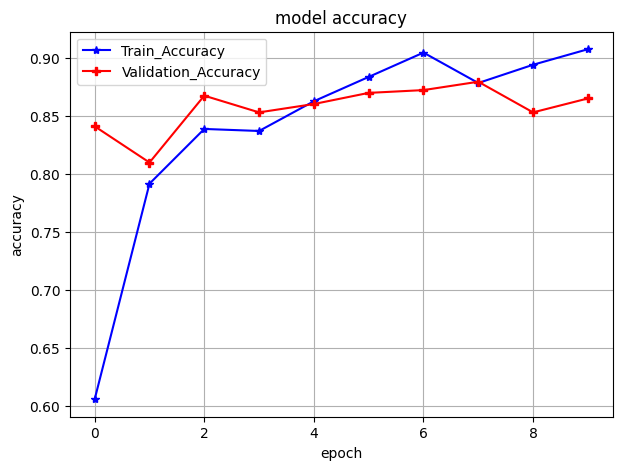

In [41]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

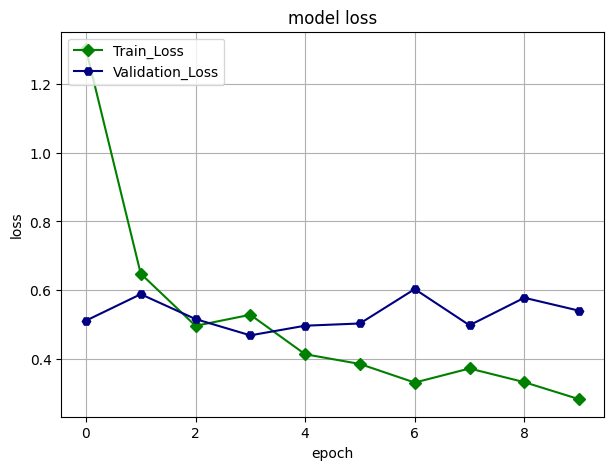

In [34]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

In [35]:
lab = top20_breed["breed"].unique().tolist()
print(lab)

['basenji', 'scottish_deerhound', 'maltese_dog', 'cairn', 'tibetan_terrier', 'shih-tzu', 'australian_terrier', 'samoyed', 'entlebucher', 'airedale', 'leonberg', 'bernese_mountain_dog', 'afghan_hound', 'miniature_pinscher', 'irish_wolfhound', 'great_pyrenees', 'beagle', 'japanese_spaniel', 'pomeranian', 'blenheim_spaniel']


14/14 [==============================] - 21s 2s/step


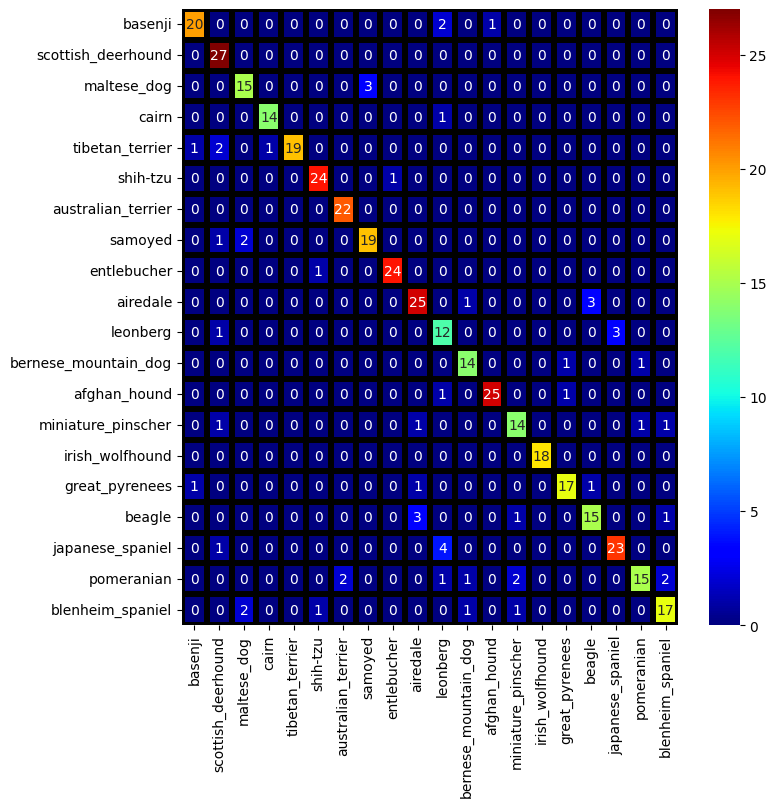

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

pre=model.predict(x_test)
predict=np.argmax(pre,axis=1)

plt.figure(figsize=(8,8))
cf=confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True,fmt="d",cmap="jet",lw=4,linecolor="black",xticklabels=lab,yticklabels=lab)
plt.show()

In [37]:
print(classification_report(y_test,predict,target_names=lab))

                      precision    recall  f1-score   support

             basenji       0.91      0.87      0.89        23
  scottish_deerhound       0.82      1.00      0.90        27
         maltese_dog       0.79      0.83      0.81        18
               cairn       0.93      0.93      0.93        15
     tibetan_terrier       1.00      0.83      0.90        23
            shih-tzu       0.92      0.96      0.94        25
  australian_terrier       0.92      1.00      0.96        22
             samoyed       0.86      0.86      0.86        22
         entlebucher       0.96      0.96      0.96        25
            airedale       0.83      0.86      0.85        29
            leonberg       0.57      0.75      0.65        16
bernese_mountain_dog       0.82      0.88      0.85        16
        afghan_hound       0.96      0.93      0.94        27
  miniature_pinscher       0.78      0.78      0.78        18
     irish_wolfhound       1.00      1.00      1.00        18
      g

1/1 [==============================] - 0s 99ms/step


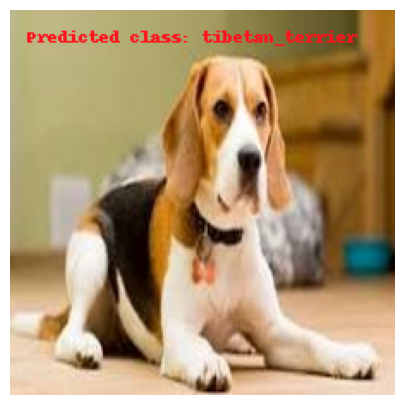

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf

# 이미지 파일의 로컬 경로
sample_data = "./dog_data/dog_sample.jpg"

# 로컬 경로에서 이미지 불러오기
image_path = Image.open(sample_data)
image_resized_rgb = image_path.resize((224, 224)).convert('RGB')
image_array_rgb = np.array(image_resized_rgb)
image_scale_rgb = image_array_rgb.astype("float32") / 255.0
image_reshape_rgb = image_scale_rgb.reshape(1, 224, 224, 3)  

# 'model'과 'lab'이 이미 정의되어 있다고 가정
final_pred = model.predict(image_reshape_rgb)[0]
max_prob = np.argmax(final_pred)
results = lab  
my_predict = results[max_prob]

# 외부 폰트를 로드하는 것이 플랫폼에 따라 다를 수 있으므로 기본 폰트를 사용
myFont = ImageFont.load_default()

image_draw = ImageDraw.Draw(image_resized_rgb)
image_draw.text((10, 10), f"Predicted class: {my_predict}", font=myFont, fill=(255, 20, 30))
# image_resized_rgb.save("my_image.png")

plt.figure(figsize=(5, 5))
plt.imshow(image_resized_rgb)
plt.axis("off")
plt.show()
